In [1]:
import pandas as pd    
import numpy as np     

df_original = pd.read_csv("DAL.csv")  #Reading the dataset into a dataframe using Pandas
print(df_original.shape)               # Should give us a good idea what the dataset looks like
df_original.head()                     # looking at the top rows to make sure everything is in order

(6395, 110)


,team,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,...,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst
0,DAL,2008,DAL,2008020015,DAL,CBJ,HOME,20081010,Team Level,other,...,9.000,7.0,7.000,1.0,0.056,0.001,0.001,0.524,0.524,0.514
1,DAL,2008,DAL,2008020015,DAL,CBJ,HOME,20081010,Team Level,all,...,43.434,34.0,35.088,10.0,0.419,0.429,0.429,2.273,2.400,2.369
2,DAL,2008,DAL,2008020015,DAL,CBJ,HOME,20081010,Team Level,5on5,...,28.434,21.0,22.088,6.0,0.262,0.428,0.428,1.606,1.733,1.712
3,DAL,2008,DAL,2008020015,DAL,CBJ,HOME,20081010,Team Level,4on5,...,5.000,5.0,5.000,0.0,0.100,0.000,0.000,0.140,0.140,0.140
4,DAL,2008,DAL,2008020015,DAL,CBJ,HOME,20081010,Team Level,5on4,...,1.000,1.0,1.000,3.0,0.002,0.000,0.000,0.003,0.003,0.003


In [2]:
# From previous we can see that there are 110 columns. Let us cut it down to only a few to be analysed
analyzed_col =['season','gameId', 'goalsFor', 'goalsAgainst', 'shotAttemptsFor', 'shotAttemptsAgainst']
# The data is split into multiple periods per game but I want to only analyse the data per game
# To accomplish that we'll use the groupby and sum functions
# Finally we want to feed it into a new data frame that we can then manipulate later
games_df = df_original[analyzed_col].groupby(['season','gameId']).sum().reset_index()   
games_df.head(10)

,season,gameId,goalsFor,goalsAgainst,shotAttemptsFor,shotAttemptsAgainst
0,2008,2008020015,8.0,10.0,122.0,84.0
1,2008,2008020024,2.0,6.0,82.0,128.0
2,2008,2008020047,12.0,8.0,120.0,88.0
3,2008,2008020054,2.0,12.0,104.0,88.0
4,2008,2008020063,8.0,10.0,122.0,80.0
5,2008,2008020079,4.0,2.0,94.0,118.0
6,2008,2008020088,0.0,10.0,70.0,92.0
7,2008,2008020093,10.0,6.0,102.0,120.0
8,2008,2008020114,10.0,12.0,110.0,110.0
9,2008,2008020134,8.0,4.0,104.0,90.0


In [3]:
# Checking my work by looking up these games I noticed that the goals count is doubted both For and Against
# This seems to be a problem with the data since it holds true for the 10 games I checked.
games_df['goalsFor'] = games_df['goalsFor'] /2             #A Simple solution to clean up the data
games_df['goalsAgainst'] = games_df['goalsAgainst'] /2
games_df.head(10)

,season,gameId,goalsFor,goalsAgainst,shotAttemptsFor,shotAttemptsAgainst
0,2008,2008020015,4.0,5.0,122.0,84.0
1,2008,2008020024,1.0,3.0,82.0,128.0
2,2008,2008020047,6.0,4.0,120.0,88.0
3,2008,2008020054,1.0,6.0,104.0,88.0
4,2008,2008020063,4.0,5.0,122.0,80.0
5,2008,2008020079,2.0,1.0,94.0,118.0
6,2008,2008020088,0.0,5.0,70.0,92.0
7,2008,2008020093,5.0,3.0,102.0,120.0
8,2008,2008020114,5.0,6.0,110.0,110.0
9,2008,2008020134,4.0,2.0,104.0,90.0


In [4]:
games_df[['goalsFor', 'goalsAgainst', 'shotAttemptsFor', 'shotAttemptsAgainst']].describe() #Get a summary of the data

,goalsFor,goalsAgainst,shotAttemptsFor,shotAttemptsAgainst
count,1279.000000,1279.000000,1279.000000,1279.000000
mean,2.889758,2.800625,116.226740,113.868647
std,1.654286,1.646393,23.760448,21.841690
min,0.000000,0.000000,54.000000,60.000000
25%,2.000000,2.000000,100.000000,98.000000
50%,3.000000,3.000000,116.000000,112.000000
75%,4.000000,4.000000,130.000000,128.000000
max,10.000000,8.000000,224.000000,196.000000


<Axes: >

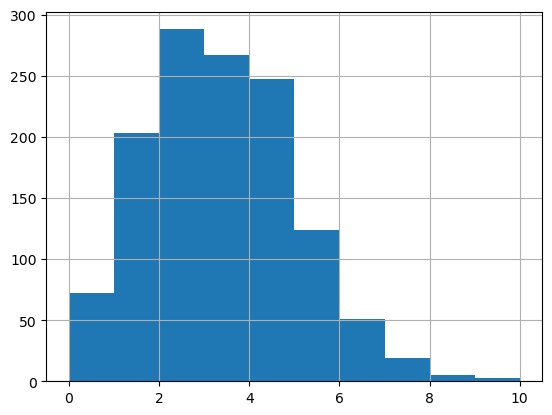

In [5]:
games_df['goalsFor'].hist()

<Axes: >

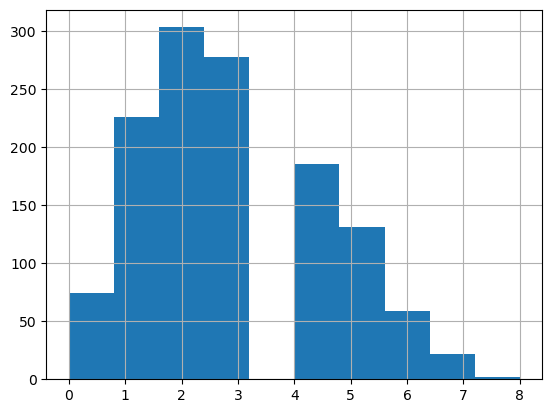

In [6]:
games_df['goalsAgainst'].hist() #the gap in this histogram is caused by the bin size

<Axes: >

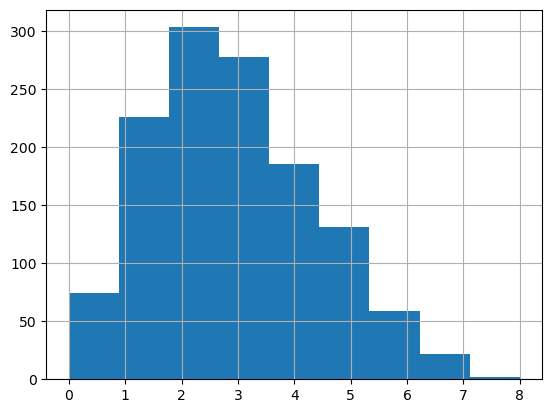

In [7]:
games_df['goalsAgainst'].hist(bins=9) # The default bin size is 10, at 9 the gap dissapears

In [8]:
#The original data did not show who won ultimately won each game
#However we have enough information to compute this ourselves

#This function takes a difference in goals and returns a string of either "Won","Lost" or "Draw"
def calc_match_result(delta_goals):
    match_result = "Won" if delta_goals > 0 else "Lost" if delta_goals < 0 else "Draw"
    return match_result


games_df['matchResult'] = (          #First we are creating an entry for each game that stores the difference in point total
    games_df['goalsFor']
    - games_df['goalsAgainst']
)
games_df['matchResult'] = [          #Then taking advantage of list comprehension we move through every entry and deploy our function
    calc_match_result(delta_goals) for delta_goals in games_df['matchResult']   
]

games_df.head()

,season,gameId,goalsFor,goalsAgainst,shotAttemptsFor,shotAttemptsAgainst,matchResult
0,2008,2008020015,4.0,5.0,122.0,84.0,Lost
1,2008,2008020024,1.0,3.0,82.0,128.0,Lost
2,2008,2008020047,6.0,4.0,120.0,88.0,Won
3,2008,2008020054,1.0,6.0,104.0,88.0,Lost
4,2008,2008020063,4.0,5.0,122.0,80.0,Lost


In [9]:
#Now that we have the match results lets look at how the team did each season

season_df = games_df[               #A newdataframe excluding gameId and grouped by season
['season', 'goalsFor', 'goalsAgainst', 'shotAttemptsFor', 'shotAttemptsAgainst', 'matchResult']
].groupby(['season']).sum().reset_index()

season_df

,season,goalsFor,goalsAgainst,shotAttemptsFor,shotAttemptsAgainst,matchResult
0,2008,224.0,251.0,8664.0,8486.0,LostLostWonLostLostWonLostWonLostWonLostLostWo...
1,2009,230.0,244.0,9196.0,9542.0,DrawDrawWonDrawWonLostWonLostWonLostWonWonDraw...
2,2010,222.0,226.0,8880.0,9384.0,WonDrawWonDrawLostWonLostLostLostWonWonWonLost...
3,2011,204.0,218.0,8950.0,9570.0,WonLostDrawWonWonWonWonLostDrawLostWonWonWonWo...
4,2012,128.0,141.0,5154.0,5580.0,WonLostWonLostLostLostLostDrawLostWonWonWonWon...
5,2013,231.0,222.0,9906.0,9492.0,LostWonWonLostLostDrawLostLostWonDrawWonLostLo...
6,2014,257.0,257.0,10208.0,9416.0,DrawLostWonWonLostWonDrawLostLostLostLostLostL...
7,2015,265.0,228.0,10180.0,9324.0,WonLostWonWonWonWonWonLostWonWonWonLostWonWonW...
8,2016,222.0,260.0,9780.0,9648.0,WonLostWonLostLostWonLostLostLostWonLostLostLo...
9,2017,231.0,222.0,9628.0,9336.0,LostLostWonLostWonWonWonWonLostLostWonWonLostW...


In [10]:
# We don't really want the match results in that form. Instead I'd like them as a win percentage
# To get this we will need to go back to the games data frame

# This will get us the counts of all the wins, losses, and draws and organize them by season.
# Furthermore sort turned off will give up the values in the same order for every season.
# while normalizing will give us it as a percentage which will be useful for the next steps
season_results = games_df[['season','matchResult']].groupby(['season']).value_counts(sort=False,normalize=True)

season_results

season  matchResult
2008    Draw           0.146341
        Lost           0.487805
        Won            0.365854
2009    Draw           0.207317
        Lost           0.426829
        Won            0.365854
2010    Draw           0.146341
        Lost           0.402439
        Won            0.451220
2011    Draw           0.134146
        Lost           0.439024
        Won            0.426829
2012    Draw           0.062500
        Lost           0.520833
        Won            0.416667
2013    Draw           0.109756
        Lost           0.451220
        Won            0.439024
2014    Draw           0.085366
        Lost           0.463415
        Won            0.451220
2015    Draw           0.048780
        Lost           0.365854
        Won            0.585366
2016    Draw           0.036585
        Lost           0.560976
        Won            0.402439
2017    Draw           0.085366
        Lost           0.451220
        Won            0.463415
2018    Draw        

In [11]:
#We really only care about the far right values so we will separate them off into an array
results_array= season_results.array

In [13]:
# We are once again interested mostly in the far right values

#Calculates all the indices that corresponde to "Win" and puts them into a List
def index_filler():
    for n in range(0,17):
         i=n*3+2
         results_index.append(i)

def win_percent(index):
    return results_array[index]
    
results_index=[]
index_filler()



season_df['matchResult'] = [
    win_percent(index) * 100 for index in results_index
] 
season_df.rename(columns ={'matchResult':'winPercent'}, inplace=True)
season_df

,season,goalsFor,goalsAgainst,shotAttemptsFor,shotAttemptsAgainst,winPercent,winPercent
0,2008,224.0,251.0,8664.0,8486.0,36.585366,36.585366
1,2009,230.0,244.0,9196.0,9542.0,36.585366,36.585366
2,2010,222.0,226.0,8880.0,9384.0,45.121951,45.121951
3,2011,204.0,218.0,8950.0,9570.0,42.682927,42.682927
4,2012,128.0,141.0,5154.0,5580.0,41.666667,41.666667
5,2013,231.0,222.0,9906.0,9492.0,43.902439,43.902439
6,2014,257.0,257.0,10208.0,9416.0,45.121951,45.121951
7,2015,265.0,228.0,10180.0,9324.0,58.536585,58.536585
8,2016,222.0,260.0,9780.0,9648.0,40.243902,40.243902
9,2017,231.0,222.0,9628.0,9336.0,46.341463,46.341463
